In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


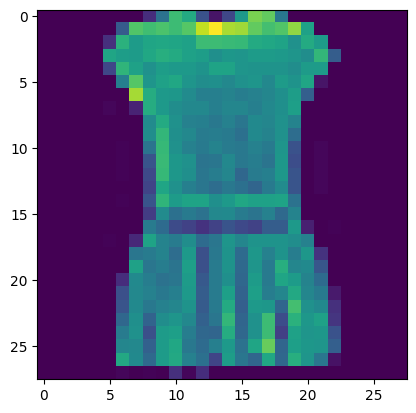

In [7]:
plt.imshow(X_train[3])
print(Y_train[3])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Changed to sparse_categorical_crossentropy
              metrics=['accuracy'])

In [12]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5209 - accuracy: 0.8177
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3872 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3490 - accuracy: 0.8719
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3272 - accuracy: 0.8797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8846


provide path:/content/mnist.jpg


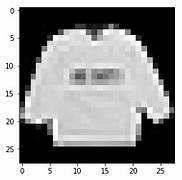

1/1 [==============================] - 0s 68ms/step
The Dress is recognized as  Bag


In [15]:
path=input('provide path:')
img=cv2.imread(path)
cv2_imshow(img)
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

imgg = cv2.resize(grayscale, (28, 28))
imgg=imgg/255
image_reshaped = np.reshape(imgg, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


print('The Dress is recognized as ', class_labels[input_pred_label])